In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read in data.

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
wego.head()

CALENDAR_ID  SERVICE_ABBR  ADHERENCE_ID        DATE  ROUTE_ABBR  \
0    120230801             1      99457890  2023-08-01          22   
1    120230801             1      99457891  2023-08-01          22   
2    120230801             1      99457892  2023-08-01          22   
3    120230801             1      99457893  2023-08-01          22   
4    120230801             1      99457894  2023-08-01          22   

   BLOCK_ABBR  OPERATOR  TRIP_ID  OVERLOAD_ID ROUTE_DIRECTION_NAME  \
0        2200      1040   345104            0          TO DOWNTOWN   
1        2200      1040   345104            0          TO DOWNTOWN   
2        2200      1040   345104            0          TO DOWNTOWN   
3        2200      1040   345104            0          TO DOWNTOWN   
4        2200      1040   345105            0        FROM DOWNTOWN   

  TIME_POINT_ABBR  ROUTE_STOP_SEQUENCE  TRIP_EDGE   LATITUDE  LONGITUDE  \
0            MHSP                 14.0          1  36.181248 -86.847705   
1            ELIZ                 10.0          0  36.193454 -86.839981   
2            CV23                  5.0          0  36.182177 -86.814445   
3         MCC5_10                  1.0          2  36.167091 -86.781923   
4         MCC5_10                  1.0          1  36.167091 -86.781923   

        SCHEDULED_TIME  ACTUAL_ARRIVAL_TIME ACTUAL_DEPARTURE_TIME  ADHERENCE  \
0  2023-08-01 04:42:00  2023-08-01 04:37:38   2023-08-01 04:44:08  -2.133333   
1  2023-08-01 04:46:00  2023-08-01 04:48:27   2023-08-01 04:48:27  -2.450000   
2  2023-08-01 04:54:00  2023-08-01 04:54:56   2023-08-01 04:54:56  -0.933333   
3  2023-08-01 05:10:00  2023-08-01 05:03:43   2023-08-01 05:03:43   6.283333   
4  2023-08-01 05:15:00  2023-08-01 05:03:43   2023-08-01 05:16:35  -1.583333   

   SCHEDULED_HDWY  ACTUAL_HDWY  HDWY_DEV  ADJUSTED_EARLY_COUNT  \
0             NaN          NaN       NaN                     0   
1             NaN          NaN       NaN                     0   
2             NaN          NaN       NaN                     0   
3             NaN          NaN       NaN                     0   
4             NaN          NaN       NaN                     0   

   ADJUSTED_LATE_COUNT  ADJUSTED_ONTIME_COUNT  STOP_CANCELLED  \
0                    0                      1               0   
1                    0                      1               0   
2                    0                      1               0   
3                    0                      1               0   
4                    0                      1               0   

   PREV_SCHED_STOP_CANCELLED  IS_RELIEF  DWELL_IN_MINS  \
0                        0.0          0       6.500000   
1                        0.0          0       0.000000   
2                        0.0          0       0.000000   
3                        NaN          0       0.000000   
4                        0.0          0      12.866666   

   SCHEDULED_LAYOVER_MINUTES  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        5.0

# Exploration

In [5]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In [6]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

In the data, the bus route can be identified by its ROUTE_ABBR value.  
3: West End  
7: Hillsboro  
22: Bordeaux  
23: Dickerson Pike  
50: Charlotte Pike  
52: Nolensville Pike  
55: Murfreesboro Pike  
56: Gallatin Pike  

In [7]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

In [8]:
wego['SERVICE_ABBR'].value_counts().sort_index()

SERVICE_ABBR
1    279300
2     37497
3     33532
Name: count, dtype: int64

In [9]:
#wego['HDWY_DEV']

In [10]:
wego['ADHERENCE'].count()

338861

In [11]:
wego['ADHERENCE'].max()

88.383333

In [12]:
wego['ADHERENCE'].mean()

-3.1887964314276354

In [13]:
wego['ADHERENCE'].nsmallest(75)

103162   -948.533333
19788    -675.000000
340625   -618.166666
30377    -542.233333
229460   -539.933333
106535   -489.316666
133942   -480.900000
326620   -480.866666
229519   -466.366666
269889   -400.533333
120932   -379.550000
308795   -375.233333
22974    -373.466666
68208    -366.933333
229708   -340.966666
212919   -330.166666
224905   -322.783333
265400   -295.466666
19876    -283.866666
3231     -241.700000
129861   -219.900000
20536    -194.000000
333130   -166.566666
209473   -149.816666
209474   -144.333333
209475   -141.183333
209477   -140.066666
209478   -140.050000
326622   -139.683333
209476   -138.800000
209479   -137.033333
155177   -134.100000
3250     -133.950000
21295    -133.250000
3249     -133.133333
53134    -132.883333
3251     -132.200000
3248     -132.033333
21296    -131.900000
330228   -128.550000
21297    -128.416666
330229   -128.100000
329793   -126.966666
257235   -126.516666
257232   -126.466666
3246     -126.300000
256791   -126.216666
329794   -125

<Axes: ylabel='ADHERENCE'>

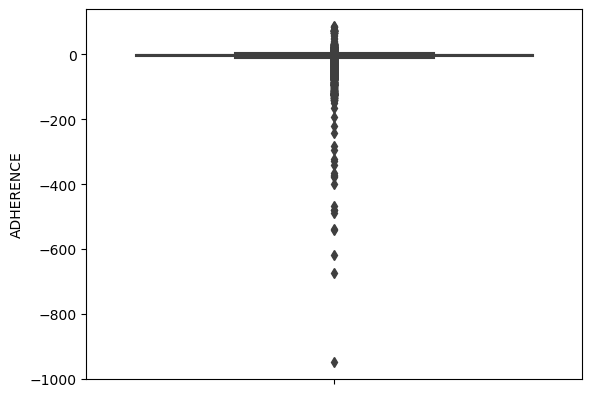

In [14]:
sns.boxplot(y="ADHERENCE",
                data=wego)

According to boxplot of adherence, most outliers are of the buses running late.

<Axes: ylabel='HDWY_DEV'>

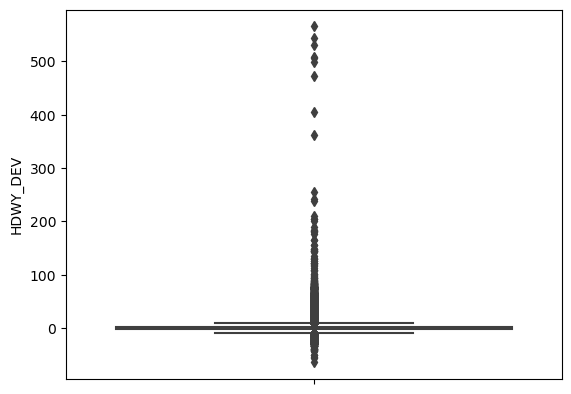

In [15]:
sns.boxplot(y='HDWY_DEV',
                data=wego)

According to boxplot of HDWY_DEV, most outliers are of 

Look at percentages of on time vs dataset.

In [16]:
wego['ADJUSTED_ONTIME_COUNT'].sum() / wego.shape[0]

0.7708411236295025

In [17]:
# Percent of on-time stops - using only tagged rows
round((wego['ADJUSTED_ONTIME_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

79.69

Look at percentages of early vs dataset.

In [18]:
wego['ADJUSTED_EARLY_COUNT'].sum() / wego.shape[0]

0.027902343225939045

In [19]:
# Percent of early - using only tagged rows
round((wego['ADJUSTED_EARLY_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

2.88

Look at percentages of late vs dataset.

In [20]:
wego['ADJUSTED_LATE_COUNT'].sum() / wego.shape[0]

0.16852158970567666

In [21]:
# Percent of late - using only tagged rows
round((wego['ADJUSTED_LATE_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

17.42

In [22]:
#Difference in percent toals when excluding NaN values for Late, Early, and On time counts.
print(77.08 + 2.79 + 16.85)
print(79.69 + 2.88 + 17.42)
print("Correct answer is 99.99")

96.72
99.99
Correct answer is 99.99


In [23]:
#find rows that do not have a value for adjusted on time, early, or late count.
zero_counts = wego[(wego['ADJUSTED_ONTIME_COUNT']==0) & (wego['ADJUSTED_EARLY_COUNT']==0) & (wego['ADJUSTED_LATE_COUNT']==0)]

In [24]:
zero_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11468 entries, 39 to 350321
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CALENDAR_ID                11468 non-null  int64  
 1   SERVICE_ABBR               11468 non-null  int64  
 2   ADHERENCE_ID               11468 non-null  int64  
 3   DATE                       11468 non-null  object 
 4   ROUTE_ABBR                 11468 non-null  int64  
 5   BLOCK_ABBR                 11468 non-null  int64  
 6   OPERATOR                   11468 non-null  int64  
 7   TRIP_ID                    11468 non-null  int64  
 8   OVERLOAD_ID                11468 non-null  int64  
 9   ROUTE_DIRECTION_NAME       11468 non-null  object 
 10  TIME_POINT_ABBR            11468 non-null  object 
 11  ROUTE_STOP_SEQUENCE        11462 non-null  float64
 12  TRIP_EDGE                  11468 non-null  int64  
 13  LATITUDE                   11468 non-null  float6

In [25]:
wego[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()

ADJUSTED_EARLY_COUNT  ADJUSTED_LATE_COUNT  ADJUSTED_ONTIME_COUNT   count
0                     0                    0                      1  270048
1                     0                    1                      0   59038
2                     0                    0                      0   11468
3                     1                    0                      0    9775

In [26]:
zero_counts.tail()

CALENDAR_ID  SERVICE_ABBR  ADHERENCE_ID        DATE  ROUTE_ABBR  \
350249    120230930             2     100406533  2023-09-30           7   
350295    120230930             2     100406581  2023-09-30           7   
350313    120230930             2     100406599  2023-09-30           7   
350319    120230930             2     100406605  2023-09-30           7   
350321    120230930             2     100406607  2023-09-30           7   

        BLOCK_ABBR  OPERATOR  TRIP_ID  OVERLOAD_ID ROUTE_DIRECTION_NAME  \
350249         701      2531   353393            0        FROM DOWNTOWN   
350295         702      2312   353438            0          TO DOWNTOWN   
350313         702      2312   353444            0          TO DOWNTOWN   
350319         702      2312   353446            0          TO DOWNTOWN   
350321         702      2312   353447            0        FROM DOWNTOWN   

       TIME_POINT_ABBR  ROUTE_STOP_SEQUENCE  TRIP_EDGE   LATITUDE  LONGITUDE  \
350249            21BK                  4.0          0  36.138881 -86.800622   
350295          MCC5_9                  3.0          2  36.167091 -86.781923   
350313          MCC5_9                  3.0          2  36.167091 -86.781923   
350319          MCC5_9                  3.0          2  36.167091 -86.781923   
350321            21BK                  4.0          0  36.138881 -86.800622   

             SCHEDULED_TIME ACTUAL_ARRIVAL_TIME ACTUAL_DEPARTURE_TIME  \
350249  2023-09-30 23:29:00                 NaN                   NaN   
350295  2023-09-30 16:03:00                 NaN                   NaN   
350313  2023-09-30 20:33:00                 NaN                   NaN   
350319  2023-09-30 21:38:00                 NaN                   NaN   
350321  2023-09-30 21:59:00                 NaN                   NaN   

        ADHERENCE  SCHEDULED_HDWY  ACTUAL_HDWY  HDWY_DEV  \
350249        NaN            30.0          NaN       NaN   
350295        NaN             NaN          NaN       NaN   
350313        NaN             NaN          NaN       NaN   
350319        NaN             NaN          NaN       NaN   
350321        NaN            30.0          NaN       NaN   

        ADJUSTED_EARLY_COUNT  ADJUSTED_LATE_COUNT  ADJUSTED_ONTIME_COUNT  \
350249                     0                    0                      0   
350295                     0                    0                      0   
350313                     0                    0                      0   
350319                     0                    0                      0   
350321                     0                    0                      0   

        STOP_CANCELLED  PREV_SCHED_STOP_CANCELLED  IS_RELIEF  DWELL_IN_MINS  \
350249               0                        0.0          0            NaN   
350295               0                        NaN          0            NaN   
350313               0                        NaN          0            NaN   
350319               0                        NaN          0            NaN   
350321               0                        0.0          0            NaN   

        SCHEDULED_LAYOVER_MINUTES  
350249                        NaN  
350295                        NaN  
350313                        NaN  
350319                        NaN  
350321                        NaN

In [27]:
zero_counts["IS_RELIEF"].sum()

133

In [28]:
zero_counts['STOP_CANCELLED'].sum()

2479

In [29]:
wego['IS_RELIEF'].sum()

4188

In [30]:
wego['STOP_CANCELLED'].sum()

5347

In [31]:
wego['PREV_SCHED_STOP_CANCELLED'].sum()

4254.0

In [32]:
wego.agg({'ADHERENCE': ['min','max','mean']})

ADHERENCE
min  -948.533333
max    88.383333
mean   -3.188796

# Clean data 

In [42]:
wego[wego['PREV_SCHED_STOP_CANCELLED']>=1].sort_values('HDWY_DEV',ascending=False)

CALENDAR_ID  SERVICE_ABBR  ADHERENCE_ID        DATE  ROUTE_ABBR  \
270201    120230917             3     100026077  2023-09-17          23   
187823    120230902             2     100388178  2023-09-02          23   
141314    120230825             1     100168684  2023-08-25          23   
227462    120230909             2     100580899  2023-09-09          52   
226       120230801             1      99458120  2023-08-01          22   
141432    120230825             1     100168804  2023-08-25          23   
227338    120230909             2     100580772  2023-09-09          52   
19604     120230804             1      99559572  2023-08-04          22   
141311    120230825             1     100168681  2023-08-25          23   
174508    120230831             1     100324386  2023-08-31          22   
271845    120230917             3     100028496  2023-09-17          52   
312142    120230924             3     100219006  2023-09-24          52   
174510    120230831             1     100324388  2023-08-31          22   
174509    120230831             1     100324387  2023-08-31          22   
140470    120230825             1     100167822  2023-08-25          22   
199576    120230905             1     100462923  2023-09-05          23   
227022    120230909             2     100580450  2023-09-09          52   
227023    120230909             2     100580451  2023-09-09          52   
124485    120230822             1     100070434  2023-08-22          52   
114534    120230821             1     100031805  2023-08-21          22   
227024    120230909             2     100580452  2023-09-09          52   
21362     120230804             1      99561815  2023-08-04           3   
239473    120230912             1     100658259  2023-09-12          22   
158672    120230828             1     100227264  2023-08-28          52   
265551    120230916             2     100001401  2023-09-16          22   
265537    120230916             2     100001387  2023-09-16          22   
141305    120230825             1     100168675  2023-08-25          23   
168114    120230830             1     100290488  2023-08-30          22   
240       120230801             1      99458134  2023-08-01          22   
292982    120230921             1     100156700  2023-09-21          22   
227324    120230909             2     100580758  2023-09-09          52   
19618     120230804             1      99559586  2023-08-04          22   
70939     120230813             3      99799920  2023-08-13          23   
70938     120230813             3      99799919  2023-08-13          23   
227337    120230909             2     100580771  2023-09-09          52   
271964    120230917             3     100028617  2023-09-17          55   
141309    120230825             1     100168679  2023-08-25          23   
271965    120230917             3     100028618  2023-09-17          55   
188634    120230902             2     100389319  2023-09-02           3   
262643    120230915             1      99982133  2023-09-15          52   
342743    120230929             1     100380854  2023-09-29          52   
255407    120230914             1      99951716  2023-09-14          52   
174546    120230831             1     100324424  2023-08-31          22   
262644    120230915             1      99982134  2023-09-15          52   
174633    120230831             1     100324513  2023-08-31          22   
343483    120230929             1     100381616  2023-09-29          52   
343484    120230929             1     100381617  2023-09-29          52   
308495    120230923             2     100195405  2023-09-23          55   
296319    120230921             1     100161197  2023-09-21          52   
275315    120230918             1     100056912  2023-09-18           3   
233871    120230911             1     100624437  2023-09-11          23   
227460    120230909             2     100580897  2023-09-09          52   
227463    120230909             2

In [45]:
#removing rows where prev sched stop cancelled is marked.
wego = wego[wego['PREV_SCHED_STOP_CANCELLED']!=1]

df = df.loc[~((df['col1'] == 'A') & (df['col2'] > 6))]  
~ negates and keeps rows that don't meet the criteria.

In [72]:
#removing nan rows where ontime, early, and late counts are all = 0.
wego_clean = wego.loc[~((wego['ADJUSTED_ONTIME_COUNT']==0) & (wego['ADJUSTED_EARLY_COUNT']==0) & (wego['ADJUSTED_LATE_COUNT']==0))]

In [61]:
#getting clean adherence and hdwy_dev to use in percentile calculations.
adherence = wego_clean['ADHERENCE']
adherence_cleaned = adherence.dropna()
hdwy_dev = wego_clean['HDWY_DEV']
hdwy_dev_cleaned = hdwy_dev.dropna()

In [73]:
#find the 1st and 99th percentile of adherence.
adherence_1 = np.percentile(adherence_cleaned,0.1)
adherence_99 = np.percentile(adherence_cleaned,99.9)
print(adherence_1)
print(adherence_99)

-57.040499999999994
9.466666


In [63]:
#find the 1st and 99th percentile of hdwy_dev
hdwy_dev_1 = np.percentile(hdwy_dev_cleaned,0.1)
hdwy_dev_99 = np.percentile(hdwy_dev_cleaned,99.9)
print(hdwy_dev_1)
print(hdwy_dev_99)

-21.624767162
56.43715000000084


In [65]:
wego_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335191 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                335191 non-null  int64  
 1   SERVICE_ABBR               335191 non-null  int64  
 2   ADHERENCE_ID               335191 non-null  int64  
 3   DATE                       335191 non-null  object 
 4   ROUTE_ABBR                 335191 non-null  int64  
 5   BLOCK_ABBR                 335191 non-null  int64  
 6   OPERATOR                   335191 non-null  int64  
 7   TRIP_ID                    335191 non-null  int64  
 8   OVERLOAD_ID                335191 non-null  int64  
 9   ROUTE_DIRECTION_NAME       335191 non-null  object 
 10  TIME_POINT_ABBR            335191 non-null  object 
 11  ROUTE_STOP_SEQUENCE        335186 non-null  float64
 12  TRIP_EDGE                  335191 non-null  int64  
 13  LATITUDE                   335191 

Next need to remove values outside of the percentile ranges of adherence and hdwy.

In [68]:
wego_clean = wego_clean.drop(wego_clean[wego_clean.ADHERENCE < adherence_1].index)
wego_clean = wego_clean.drop(wego_clean[wego_clean.ADHERENCE > adherence_99].index)
wego_clean = wego_clean.drop(wego_clean[wego_clean.HDWY_DEV < hdwy_dev_1].index)
wego_clean = wego_clean.drop(wego_clean[wego_clean.HDWY_DEV > hdwy_dev_99].index)

In [70]:
wego_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334031 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                334031 non-null  int64  
 1   SERVICE_ABBR               334031 non-null  int64  
 2   ADHERENCE_ID               334031 non-null  int64  
 3   DATE                       334031 non-null  object 
 4   ROUTE_ABBR                 334031 non-null  int64  
 5   BLOCK_ABBR                 334031 non-null  int64  
 6   OPERATOR                   334031 non-null  int64  
 7   TRIP_ID                    334031 non-null  int64  
 8   OVERLOAD_ID                334031 non-null  int64  
 9   ROUTE_DIRECTION_NAME       334031 non-null  object 
 10  TIME_POINT_ABBR            334031 non-null  object 
 11  ROUTE_STOP_SEQUENCE        334026 non-null  float64
 12  TRIP_EDGE                  334031 non-null  int64  
 13  LATITUDE                   334031 

# Q1 What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 

In [74]:
# Percent of on-time stops - using only tagged rows in clean data set
round((wego_clean['ADJUSTED_ONTIME_COUNT'].sum()) / (wego_clean['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego_clean['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego_clean['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

79.76

In [75]:
# Percent of early count - using only tagged rows in clean data set
round((wego_clean['ADJUSTED_EARLY_COUNT'].sum()) / (wego_clean['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego_clean['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego_clean['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

2.89

In [76]:
# Percent of late count - using only tagged rows in clean data set
round((wego_clean['ADJUSTED_LATE_COUNT'].sum()) / (wego_clean['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego_clean['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego_clean['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

17.34

On-time performance shows that the busses are on time 79.76% of the time.

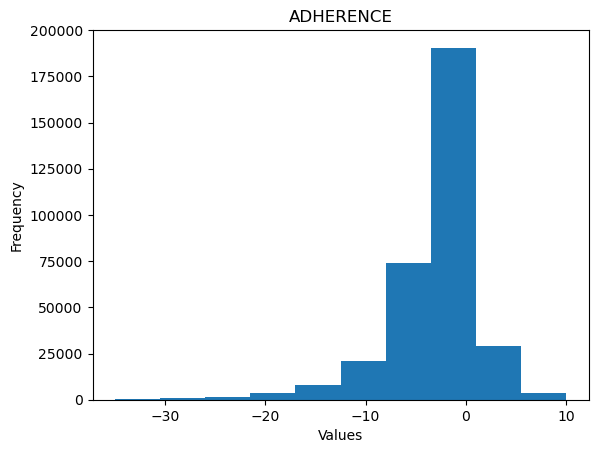

In [86]:
plt.hist(wego_clean["ADHERENCE"], bins=10, range=(-35,10) )
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("ADHERENCE")
plt.show()

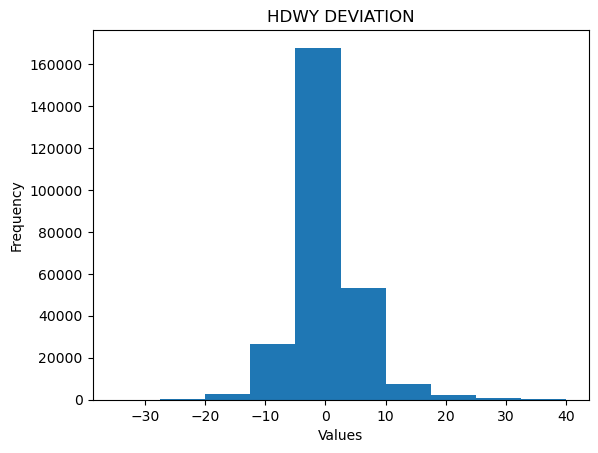

In [89]:
plt.hist(wego_clean["HDWY_DEV"], bins=10, range=(-35,40) )
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("HDWY DEVIATION")
plt.show()